<h3>1. Contour Detection</h3>

<function matplotlib.pyplot.show(close=None, block=None)>

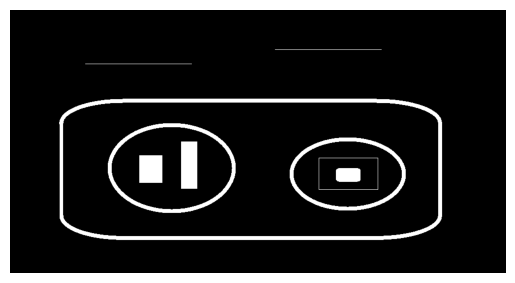

In [1]:
# 1. Read the Image and convert it to Grayscale Format
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('contour_test_hierarchy.png')
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

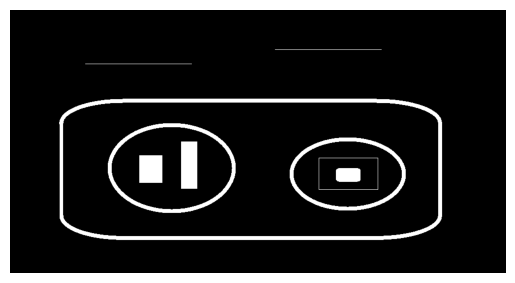

In [2]:
# 2. Apply Binary Thresholding or Canny edge detection
ret, thresh = cv2.threshold(img_gray, 142, 255, cv2.THRESH_BINARY)
# thresh = thresh[50:450, 50:1260]

plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show

(-0.5, 1008.5, 535.5, -0.5)

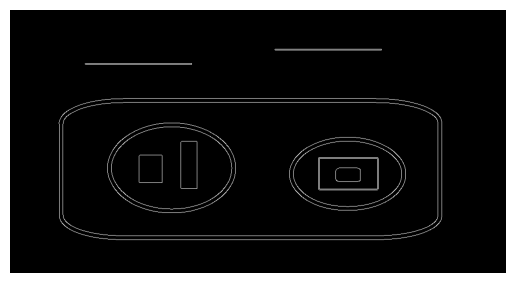

In [3]:
edges = cv2.Canny(img_gray, 110, 200)
plt.imshow(edges,cmap = 'gray')
plt.axis('off')

In [15]:
# 3. Find the Contours
# hàm cv2.findContours()
# --> contours, hierarchy = cv2.findContours(image, mode, method, contours=None, hierarchy=None, offset=None)

# 1. image: Ảnh đầu vào ở dạng nhị phân (binary image). Thông thường, ảnh này được tạo ra bằng cách sử dụng các 
#    phương pháp như ngưỡng (thresholding) hoặc phát hiện cạnh (edge detection).
#
# 2. mode: Chế độ tìm kiếm đường viền.
#  --> cv2.RETR_EXTERNAL: Chỉ tìm các đường viền ngoài cùng.
#  --> cv2.RETR_LIST: Tìm tất cả các đường viền và lưu trữ chúng mà không cần cấu trúc phân cấp.
#  --> cv2.RETR_CCOMP: Tìm tất cả các đường viền và tổ chức chúng thành hai cấp độ phân cấp.
#  --> cv2.RETR_TREE: Tìm tất cả các đường viền và tổ chức chúng thành một cây phân cấp đầy đủ.
#
# 3. method: Phương pháp xấp xỉ đường viền. 
#  --> cv2.CHAIN_APPROX_NONE: Lưu trữ tất cả các điểm trên đường viền.
#  --> cv2.CHAIN_APPROX_SIMPLE: Loại bỏ các điểm dư thừa và chỉ lưu trữ các điểm cuối cùng của mỗi đoạn thẳng.
#  --> cv2.CHAIN_APPROX_TC89_L1 và cv2.CHAIN_APPROX_TC89_KCOS: Các phương pháp xấp xỉ khác sử dụng thuật toán Teh-Chin.
#
# 4. contours: Đầu ra là một danh sách các đường viền được tìm thấy. Mỗi đường viền là một mảng các điểm (tọa độ x, y).
#
# 5. hierarchy: Đầu ra là một mảng chứa thông tin phân cấp của các đường viền.
#
# 6. offset: Tùy chọn, một điểm để bù đắp cho các điểm đường viền.

# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_NONE)
# contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)

# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_LIST, method=cv2.CHAIN_APPROX_SIMPLE)
# contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_CCOMP, method=cv2.CHAIN_APPROX_SIMPLE)
contours, hierarchy = cv2.findContours(image=thresh, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)
print(len(contours))
print(hierarchy)

13
[[[11 -1  1 -1]
  [-1 -1  2  0]
  [ 7 -1  3  1]
  [-1 -1  4  2]
  [-1 -1  5  3]
  [-1 -1  6  4]
  [-1 -1 -1  5]
  [-1  2  8  1]
  [-1 -1  9  7]
  [10 -1 -1  8]
  [-1  9 -1  8]
  [12  0 -1 -1]
  [-1 11 -1 -1]]]


<function matplotlib.pyplot.show(close=None, block=None)>

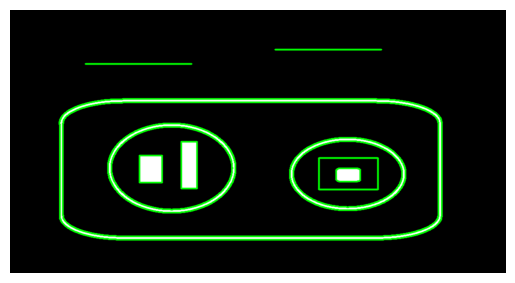

In [16]:
# 4. Draw the Contours
image_copy = image.copy()
# image_copy = image_copy[50:450, 50:1260]
cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

plt.imshow(image_copy[:,:,::-1])
plt.axis('off')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

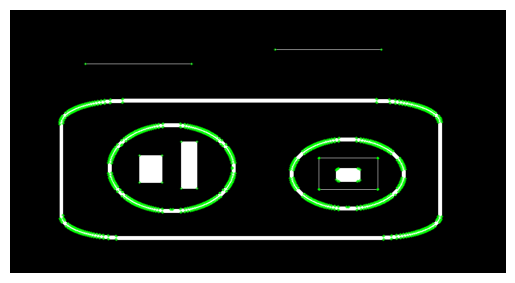

In [17]:
image_copy_2 = image.copy()
for i, contour in enumerate(contours): 
   for j, contour_point in enumerate(contour): 
       cv2.circle(image_copy_2, ((contour_point[0][0], contour_point[0][1])), 2, (0, 255, 0), 1, cv2.LINE_AA)

plt.imshow(image_copy_2[:,:,::-1])
plt.axis('off')
plt.show

<h3>2. Contour features</h3>

<h4>Moments</h4>

In [176]:
# Moments giúp tính toán một số đặc điểm như tâm khối của vật thể, diện tích của vật thể,... 
cnt = contours[0]
M = cv2.moments(cnt)
print(M)
print()
# Centroid được tính theo công thức cx = M10/M00, cy = M01/M00
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
print(cx, cy)

{'m00': 57189.5, 'm10': 10486815.5, 'm01': 13287783.166666666, 'm20': 2242314001.9166665, 'm11': 2406864709.7916665, 'm02': 3529071825.25, 'm30': 550498988293.4501, 'm21': 501284213637.75, 'm12': 624676986020.8167, 'm03': 1028370962148.75, 'mu20': 319350882.2698736, 'mu11': -29710718.789438248, 'mu02': 441701215.53405523, 'mu30': 22208291654.740112, 'mu21': -8813629435.10086, 'mu12': -8641122017.28946, 'mu03': 3147780507.822754, 'nu20': 0.09764174249534115, 'nu11': -0.00908407182961302, 'nu02': 0.1350504374389323, 'nu30': 0.028393857819780627, 'nu21': -0.01126844626083941, 'nu12': -0.011047891201029171, 'nu03': 0.004024516319242389}

183 232


<h4>Contour Area</h4>

In [177]:
# Diện tích đường viền được tính bằng hàm cv2.contourArea() hoặc moments M['m00']
area = cv2.contourArea(cnt)
print(area)

57189.5


<h4>Contour Perimeter</h4>

In [178]:
# Tham số thứ hai thể hiện là viền khép kín hay chỉ là đường cong
perimeter = cv2.arcLength(cnt,True)
print(perimeter)

2003.0205434560776


<h4>Contour Approximation</h4>

In [179]:
epsilon = 0.1 * cv2.arcLength(cnt, True)
approx = cv2.approxPolyDP(cnt, epsilon, True)
print(approx)

[[[120  27]]

 [[166 448]]

 [[411 158]]]


<h4>Convex Hull</h4>

In [180]:
hull = cv2.convexHull(cnt)
print(hull)

[[[136  26]]

 [[186  42]]

 [[189  43]]

 [[194  45]]

 [[398 130]]

 [[403 136]]

 [[407 144]]

 [[411 158]]

 [[411 159]]

 [[368 245]]

 [[180 435]]

 [[179 436]]

 [[166 448]]

 [[151 448]]

 [[145 443]]

 [[ 42 247]]

 [[ 41 245]]

 [[ 36 228]]

 [[ 36 227]]

 [[ 53 174]]

 [[101  37]]

 [[109  29]]

 [[120  27]]

 [[135  26]]]


<function matplotlib.pyplot.show(close=None, block=None)>

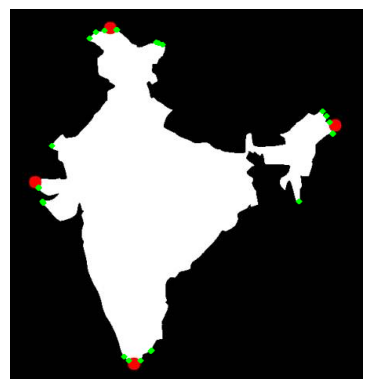

In [181]:
image_copy_hull = image.copy()
for i, contour_point in enumerate(hull): 
    cv2.circle(image_copy_hull, (contour_point[0][0], contour_point[0][1]), 2, (0, 255, 0), 2, cv2.LINE_AA)

plt.imshow(image_copy_hull[:,:,::-1])
plt.axis('off')
plt.show

<h4>Extreme Points</h4>

(36, 227)
(411, 159)
(135, 26)
(151, 448)


<function matplotlib.pyplot.show(close=None, block=None)>

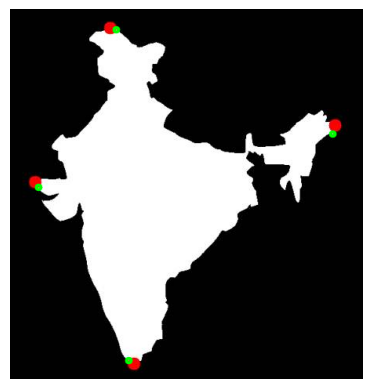

In [182]:
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

print(leftmost)
print(rightmost)
print(topmost)
print(bottommost)

image_copy_extreme = image.copy()
cv2.circle(image_copy_extreme, leftmost , 3, (0, 255, 0), 2, cv2.LINE_AA)
cv2.circle(image_copy_extreme, rightmost , 3, (0, 255, 0), 2, cv2.LINE_AA)
cv2.circle(image_copy_extreme, topmost , 3, (0, 255, 0), 2, cv2.LINE_AA)
cv2.circle(image_copy_extreme, bottommost , 3, (0, 255, 0), 2, cv2.LINE_AA)
plt.imshow(image_copy_extreme[:,:,::-1])
plt.axis('off')
plt.show